In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(r"laptops.csv")

In [3]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [6]:
cols = ['ram', 'storage', 'screen', 'final_price']
df2 = df[cols]

In [7]:
df2

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


<Axes: xlabel='final_price', ylabel='Count'>

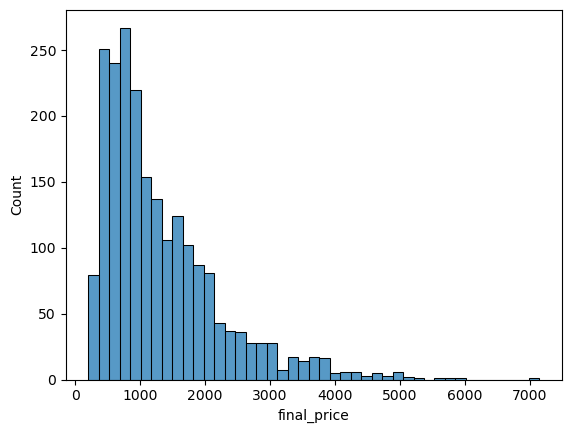

In [8]:
sns.histplot(df2['final_price'])

# Q1

In [9]:
df2.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Q2

In [10]:
df2.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


# Q3

In [11]:
# Train test split
np.random.seed(42)

n = len(df2)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df2.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

# y_train = np.log1p(df_train.final_price.values)
# y_val = np.log1p(df_val.final_price.values)
# y_test = np.log1p(df_test.final_price.values)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [14]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(1296, 3)
(432, 3)
(432, 3)


In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [16]:
# Check Nulls
print('Train: \n', df_train.isna().sum())
print('Val: \n', df_val.isna().sum())
print('Test: \n', df_test.isna().sum())

Train: 
 ram        0
storage    0
screen     3
dtype: int64
Val: 
 ram        0
storage    0
screen     1
dtype: int64
Test: 
 ram        0
storage    0
screen     0
dtype: int64


In [17]:
# Trying 0 for null values
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)

676.8954853003877 [ 43.70681555   0.86506867 -36.10399833]


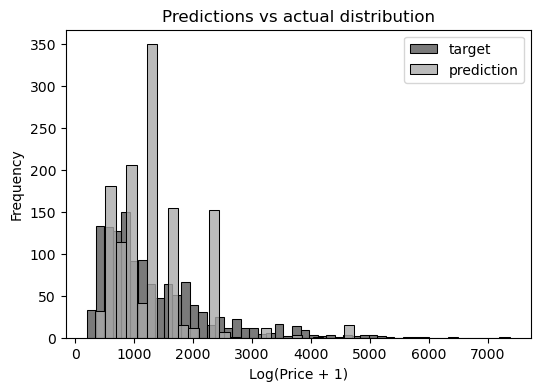

In [18]:
w_0, w = train_linear_regression(df_train, y_train)
print(w_0, w)

y_pred = w_0 + df_train.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [19]:
print(round(rmse(y_train, y_pred), 2))

# Validaton
y_pred = w_0 + df_val.dot(w)
print(round(rmse(y_val, y_pred), 2))

602.39
597.36


In [20]:
# Filling NULLs with mean of training
# Run the aove cell again to create the train_test split
mean_val = df_train['screen'].mean()
df_train = df_train.fillna(mean_val)
df_val = df_val.fillna(mean_val)
df_test = df_test.fillna(mean_val)

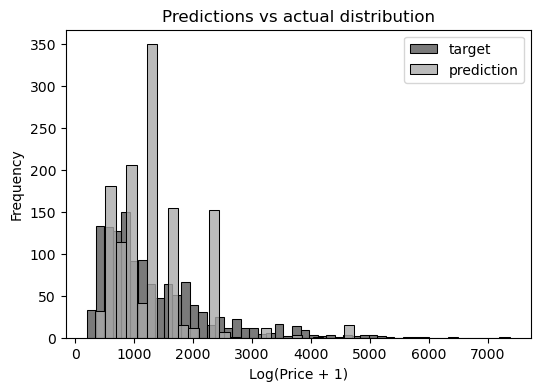

In [21]:
w_0, w = train_linear_regression(df_train, y_train)
print(w_0, w)

y_pred = w_0 + df_train.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [22]:
print(round(rmse(y_train, y_pred), 2))

# Validaton
y_pred = w_0 + df_val.dot(w)
print(round(rmse(y_val, y_pred), 2))

602.39
597.36


# Q4

In [23]:
# Prepare the data

# Train test split
np.random.seed(42)

n = len(df2)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df2.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [24]:
# Fil 0 for null values
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)

In [25]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [26]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    print((r, w_0, w, w))

(0, 676.8954853003877, array([ 43.70681555,   0.86506867, -36.10399833]), array([ 43.70681555,   0.86506867, -36.10399833]))
(0.01, 676.2736817204777, array([ 43.70642381,   0.86504106, -36.06174277]), array([ 43.70642381,   0.86504106, -36.06174277]))
(0.1, 670.7284836313243, array([ 43.7029297 ,   0.8647949 , -35.68491076]), array([ 43.7029297 ,   0.8647949 , -35.68491076]))
(1, 619.9030834107429, array([ 43.67085331,   0.8625399 , -32.23099446]), array([ 43.67085331,   0.8625399 , -32.23099446]))
(5, 463.77716971421705, array([ 43.57148787,   0.85563277, -21.62118714]), array([ 43.57148787,   0.85563277, -21.62118714]))
(10, 352.7971336767701, array([ 43.49940147,   0.85075755, -14.07928221]), array([ 43.49940147,   0.85075755, -14.07928221]))
(100, 66.92071440179802, array([43.26181083,  0.83943545,  5.35037812]), array([43.26181083,  0.83943545,  5.35037812]))


In [35]:
# For r == 0
w_0, w = train_linear_regression_reg(df_train, y_train, r=0)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))

train 602.3920520606714
val 597.3635593619622


In [36]:
# For r == 0.01
w_0, w = train_linear_regression_reg(df_train, y_train, r=0.01)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))

train 602.3920547636963
val 597.3616819856015


In [37]:
# For r == 0.1
w_0, w = train_linear_regression_reg(df_train, y_train, r=0.1)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))

train 602.3923179443268
val 597.3451592963622


In [38]:
# For r == 1
w_0, w = train_linear_regression_reg(df_train, y_train, r=1)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))

train 602.4147595644097
val 597.2121215589522


In [39]:
# For r == 5
w_0, w = train_linear_regression_reg(df_train, y_train, r=5)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))

train 602.7094989558278
val 597.0111186297034


In [40]:
# For r == 10
w_0, w = train_linear_regression_reg(df_train, y_train, r=10)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))

train 603.1259465075947
val 597.0587680661116


In [41]:
# For r == 100
w_0, w = train_linear_regression_reg(df_train, y_train, r=100)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))

train 604.9878055675412
val 597.9032640603045


# Q5

In [43]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [44]:
# Prepare the data
val_scores = []
# Train test split
for s in seeds:
    np.random.seed(s)

    n = len(df2)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df2.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    # Fil 0 for null values
    df_train = df_train.fillna(0)
    df_val = df_val.fillna(0)
    df_test = df_test.fillna(0)
    
    w_0, w = train_linear_regression(df_train, y_train)
#     print(w_0, w)
    print('For Seed: ', s)
    y_pred = w_0 + df_train.dot(w)
    print(round(rmse(y_train, y_pred), 2))

    # Validaton
    y_pred = w_0 + df_val.dot(w)
    print(round(rmse(y_val, y_pred), 2))
    val_scores.append(rmse(y_val, y_pred))

For Seed:  0
602.88
565.45
For Seed:  1
581.03
636.8
For Seed:  2
591.11
588.96
For Seed:  3
576.9
597.81
For Seed:  4
590.65
571.96
For Seed:  5
603.65
573.24
For Seed:  6
588.46
647.34
For Seed:  7
590.66
550.44
For Seed:  8
563.29
587.33
For Seed:  9
591.38
576.1


In [45]:
round(np.std(val_scores), 3)

29.176

# Q6

In [46]:
np.random.seed(9)

n = len(df2)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df2.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = pd.concat([df_train, df_val], sort=False)

y_train = df_train.final_price.values
# y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
# del df_val['final_price']
del df_test['final_price']

# Fil 0 for null values
df_train = df_train.fillna(0)
# df_val = df_val.fillna(0)
df_test = df_test.fillna(0)

In [47]:
# Check Nulls
print('Train: \n', df_train.isna().sum())
# print('Val: \n', df_val.isna().sum())
print('Test: \n', df_test.isna().sum())

Train: 
 ram        0
storage    0
screen     0
dtype: int64
Test: 
 ram        0
storage    0
screen     0
dtype: int64


In [48]:
# For r == 0
w_0, w = train_linear_regression_reg(df_train, y_train, r=0.001)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

train 586.1916732996197


In [49]:
y_pred = w_0 + df_test.dot(w)
print('train', rmse(y_test, y_pred))

train 608.6099822049573
